In [185]:
import ROOT
from rootpy.io import root_open
from rootpy.plotting import set_style, Canvas, Hist, Legend
set_style('ATLAS', shape='rect')

from tools.sample import Sample
from tools.fancy import syst_envelop, envelop

INFO:rootpy.plotting.style:using ROOT style 'ATLAS(shape=rect)'


In [186]:
#cat = 'hhAll_cba_vbf_lowdr_signal'
#cat = 'hhAll_cba_vbf_highdr_tight_signal'
#cat = 'hhAll_cba_vbf_highdr_loose_signal'
#cat = 'hhAll_cba_boost_tight_signal'
cat = 'hhAll_cba_boost_loose_signal'

#cat = 'hhAll_cba_boost_signal'

In [187]:
rfile = root_open('/Users/quentin/cernbox/170830_v18_comb_WSinput/hhAll_merged_WSinput_rebinned_WithTheoryEnv_WithModJERVar.root')

In [188]:
Fake = Sample('Fake', 'grey', 'Fake')
systs = Fake.systematics(cat, rfile)
#systs

In [189]:
h_nom = Fake.hist(rfile, cat)

In [190]:
syst_fake_high = sorted(filter(lambda t: ('fake' in t or 'dPhi' in t) and 'extrap' not in t, systs[0]))
syst_fake_low  = sorted(filter(lambda t: ('fake' in t or 'dPhi' in t) and 'extrap' not in t, systs[1]))

In [191]:
syst_fake_high  = syst_fake_high[::-1]

In [192]:
syst_fake_low = syst_fake_low[::-1]

In [193]:
hists_high = []
for s in syst_fake_high:
    h = Fake.hist(rfile, cat, name=s)
    hists_high.append(h)
print hists_high

[Hist('fake_contamination_high'), Hist('dPhiWeightSys_high'), Hist('dPhiWeightStat_high'), Hist('dPhiWeightClosSys_high')]


In [194]:
hists_low = []
for s in syst_fake_low:
    h = Fake.hist(rfile, cat, name=s)
    hists_low.append(h)
print hists_low

[Hist('fake_contamination_low'), Hist('dPhiWeightSys_low'), Hist('dPhiWeightStat_low'), Hist('dPhiWeightClosSys_low')]


In [195]:
from tools.fancy import syst_envelop, envelop
band = envelop(h_nom, hists_low, hists_high)
#print hists_low[:4]
#band_0 = envelop(h_nom, hists_low[:4], hists_high[:4]) # all but fake_extrapolation
band_1 = envelop(h_nom, hists_low[:3], hists_high[:3]) # all but fake_extrap and fake_conta
band_2 = envelop(h_nom, hists_low[:2], hists_high[:2]) # all but fake_extrap, fake_cont, dPhiWeightSys
band_3 = envelop(h_nom, hists_low[:1], hists_high[:1]) # all but fake_extra, fake_cont, dPhiWeigtSys, dPhiWeightStat
sub_bands = [band_1, band_2, band_3]
col_bands = ['blue', 'green', 'purple']

4
3
2
1


dPhiWeightStat
dPhiWeightSys
fake_contamination


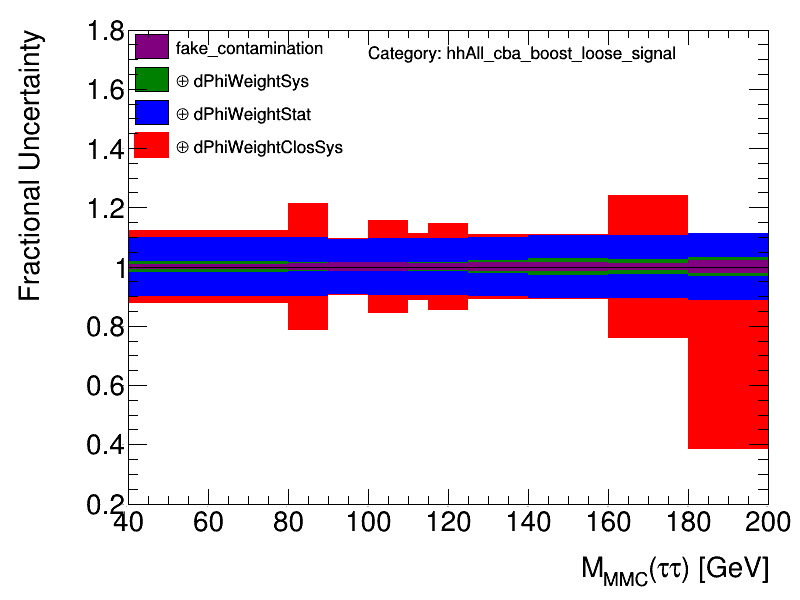

In [196]:

c = Canvas()
h = Hist(10, 40, 200)
for b in h:
    b.value = 1
h.yaxis.SetRangeUser(0.2, 1.8)
h.xaxis.title = h_nom.xaxis.title
h.yaxis.title = 'Fractional Uncertainty'

cat_label = ROOT.TText(100, 1.7, 'Category: ' + cat)
cat_label.SetTextSize(18)
h.Draw('HIST')
band.color = 'red'
band.fillstyle = 'solid'
#band.linecolor = 'black'
band.linewidth = 2
band.legendstyle = 'f'
band.Draw('sameE2')
band.title = '#oplus {0}'.format(hists_low[-1].name).replace('_low', '')
for ib, b in enumerate(sub_bands):
    #print 'boo'
    b.fillcolor = col_bands[ib]
    b.fillstyle = 'solid'
    b.legendstyle = 'f'
    b.title = '{0}'.format(hists_low[len(hists_low) - 2 - ib].name.replace('_low', ''))
    print b.title
    if ib != len(sub_bands) - 1:
        b.title = '#oplus ' + b.title
    b.Draw('sameE2')
#low.color = 'red'
#low.Draw('SAMEHIST')
h.Draw('same')
cat_label.Draw()
leg = Legend(sub_bands[::-1] + [band], pad=c, textsize=18, rightmargin=0.5, leftmargin=0., topmargin=0, margin=0.2, entryheight=0.04)
leg.SetNColumns(1)
leg.Draw()
c.RedrawAxis()
c.SaveAs('plots/fractional_fake_uncert_{0}.pdf'.format(cat))
c

In [197]:
help(Legend)

Help on class Legend in module rootpy.plotting.legend:

class Legend(rootpy.plotting.box._Positionable, rootpy.base.Object, ROOT.TLegend)
 |  Method resolution order:
 |      Legend
 |      rootpy.plotting.box._Positionable
 |      rootpy.base.Object
 |      ROOT.TLegend
 |      rootpy.utils.hook._rootpy_TLegend_OrigMethods
 |      ROOT.TPave
 |      ROOT.TBox
 |      rootpy.utils.hook._rootpy_TBox_OrigMethods
 |      cppyy.TObject
 |      ROOT.TAttLine
 |      ROOT.TAttFill
 |      ROOT.TAttBBox2D
 |      ROOT.TAttText
 |      ROOT.ObjectProxy
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  AddEntry(self, thing, label=None, style=None)
 |      Add an entry to the legend.
 |      
 |      If `label` is None, `thing.GetTitle()` will be used as the label.
 |      
 |      If `style` is None, `thing.legendstyle` is used if present,
 |      otherwise `P`.
 |  
 |  Draw(self, *args, **kwargs)
 |  
 |  Height(self)
 |  
 |  Width(self)
 |  
 |  __init__(self, entries, pad=